# Author : Nikita Somani
## Task 1 : Prediction using Supervised Machine Learning
## GRIP @ The Sparks Foundation
## Linear Regression
 - Predict the marks of the student based on the number of study hours 
 - In this task I used simple linear regression as it involves just two variables i.e Hours and Scores 

## 1. Importing Required Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline 

## 2. Importing Dataset from url

In [3]:
url = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
print("Data Imported")

Data Imported


In [4]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## 3. Data Cleaning 

In [5]:
#This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


***
**Note: Here there are no missing or null values so we will move forward**
***

In [6]:
# To see the statistical details of the dataset, we can use describe()
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## 4. Plotting the Distribution of Scores

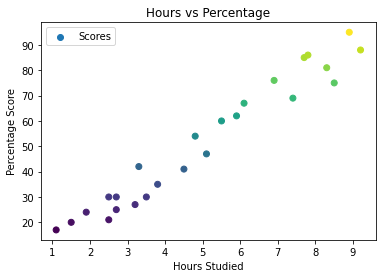

In [7]:
plt.scatter(df.Hours,df.Scores, c = df.Scores, label = 'Scores')

plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

plt.legend()
plt.show()

From the graph we can safely assume a positive linear relation between the number of hours studied and percentage of score.

## 5. Data Preprocessing

This step involved division of data into "attributes" (inputs) and "labels" (outputs).

In [8]:
# Here we can use iloc to assign the values of the variable in to X and y

X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [9]:
X.shape
y.shape

(25,)

## 6. Importing libraries for Linear Regression

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## 7. Splitting Training and Testing Datasets

Splitting the data into training and testing sets, and training the algorithm.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Plotting the training and testing data

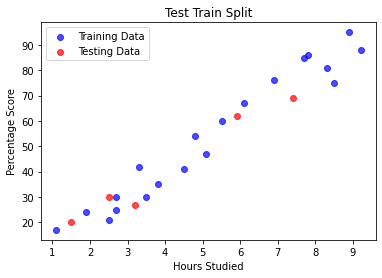

In [12]:
plt.scatter(X_train,y_train,color= "blue", label = "Training Data", alpha = 0.7)
plt.scatter(X_test,y_test,color="red", label= "Testing Data", alpha = 0.7)

plt.title('Test Train Split')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

plt.legend()
plt.show()

### 8. Fitting Training Data in Linear Regression Model

In [13]:
LR = LinearRegression()
LR.fit(X_train.reshape(-1,1),y_train)
y_pred = LR.predict(X_test)
print("Training complete.")

Training complete.


In [14]:
print(LR.intercept_)

2.018160041434683


In [15]:
print(LR.coef_)

[9.91065648]


In [16]:
y_pred = LR.predict(X_test.reshape(-1,1))

## 9. Regression Line

### Plotting the Line of regression on Training Data 

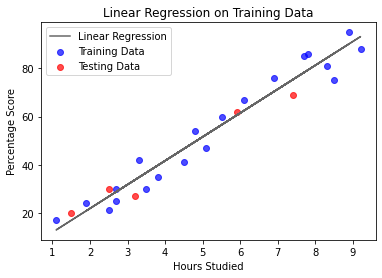

In [17]:
plt.scatter(X_train,y_train,color= "blue", label = "Training Data", alpha = 0.7)
plt.scatter(X_test,y_test,color="red", label= "Testing Data", alpha = 0.7)
plt.plot(X_train, LR.predict(X_train) ,c = '#666666' , label = 'Linear Regression')

plt.title('Linear Regression on Training Data')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

plt.legend()
plt.show()

### Plotting the Line of regression on Testing Data 

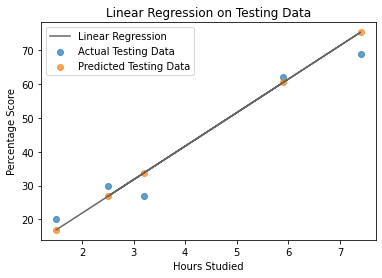

In [18]:
plt.scatter(X_test,y_test,label = "Actual Testing Data", alpha = 0.7)
plt.scatter(X_test,y_pred, label = "Predicted Testing Data", alpha = 0.7)
plt.plot(X_test,y_pred,c = '#666666' , label = 'Linear Regression')

plt.title('Linear Regression on Testing Data')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

plt.legend()
plt.show()

### Plotting the Line of regression 

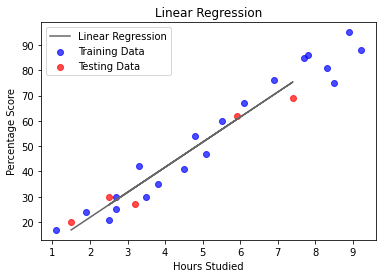

In [19]:
plt.scatter(X_train,y_train,color= "blue", label = "Training Data", alpha = 0.7)
plt.scatter(X_test,y_test,color="red", label= "Testing Data", alpha = 0.7)
plt.plot(X_test, y_pred ,c = '#666666' , label = 'Linear Regression')

plt.title('Linear Regression')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

plt.legend()
plt.show()

## 10. Comparing Predicted Data with Testing Data

In [20]:
score = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
score

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [21]:
#Estimating training and test score
print("Training Score:",LR.score(X_train,y_train))
print("Test Score:",LR.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


### Plotting the Bar graph to depict the difference between the actual and predicted value

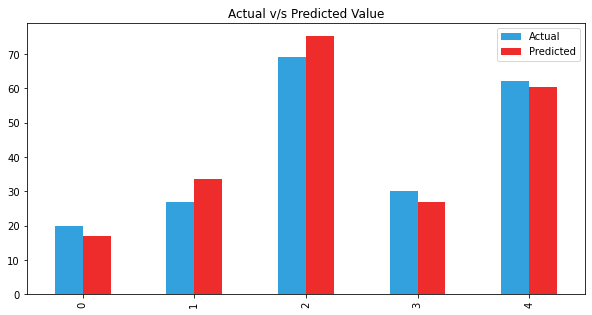

In [22]:
score.plot(kind='bar',figsize=(10,5), color = ["#33A1DE","#EE2C2C"])
plt.grid(which='minor', linewidth='0.5')
plt.title("Actual v/s Predicted Value")
plt.show()

### Testing the model with our own data

In [23]:
hours = 9.3
test = np.array([hours])
test = test.reshape(-1, 1)
score_pred = LR.predict(test)
print("If the student studies {} hrs/day he would get {} percentage.".format(hours,score_pred[0]))

If the student studies 9.3 hrs/day he would get 94.18726531140749 percentage.


## 11.Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy.

In [24]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356


R-2 gives the score of model fit and in this case we have R-2 = 0.9454906892105355 which is actually a great score for this model.

*********
**Note: The accuracy of the model is 94.54%**
 ***

## Conclusion
### I was successfully able to carry-out Prediction using Supervised Machine Learning task by using Linear Regression and was able to evaluate the model's performance on various parameters.